In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [128]:
dataset=pd.read_csv('CarPrice_project.csv')

In [129]:
len(dataset)

205

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [131]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [126]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [132]:
highest_price= dataset.nlargest(1,'price')[['CarName','price']]
print(highest_price)

                            CarName    price
74  buick regal sport coupe (turbo)  45400.0


In [133]:
lowest_price= dataset.nsmallest(1,'price')[['CarName','price']]
print(lowest_price)

    CarName   price
138  subaru  5118.0


In [134]:
highest_rpm= dataset.nlargest(1,'peakrpm')[['CarName','peakrpm']]
print(highest_rpm)

                       CarName  peakrpm
165  toyota celica gt liftback     6600


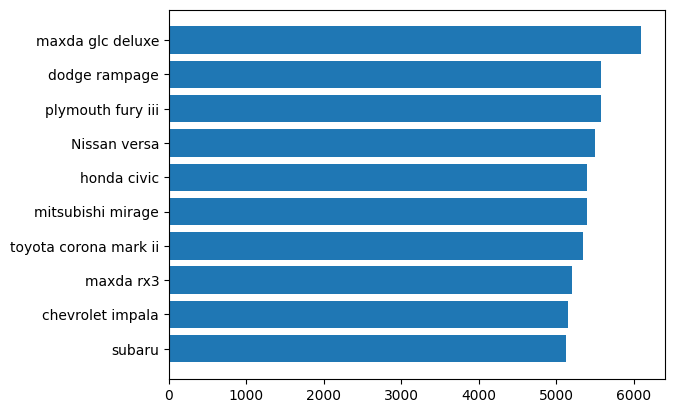

In [135]:
y=dataset['price'].sort_values().head(10)
x=dataset.sort_values(by=['price'])['CarName'].head(10)
plt.barh(x,y)
plt.show()

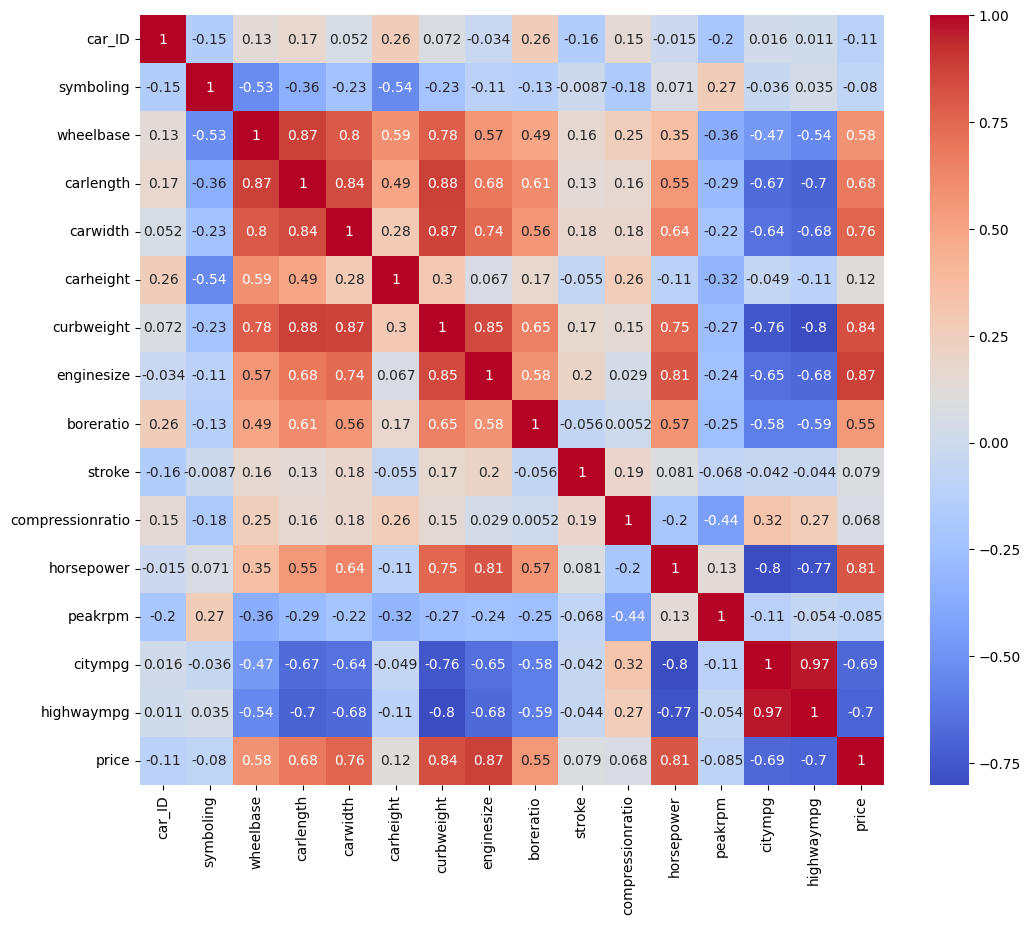

In [136]:
numerical_features = dataset.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

ax = plt.subplots(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

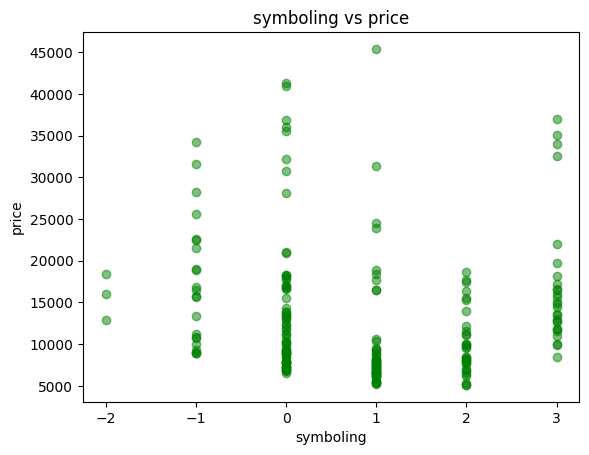

In [137]:
plt.scatter(dataset['symboling'],dataset['price'],color='green',alpha=0.5)
plt.title('symboling vs price')
plt.xlabel('symboling')
plt.ylabel('price')
plt.show()


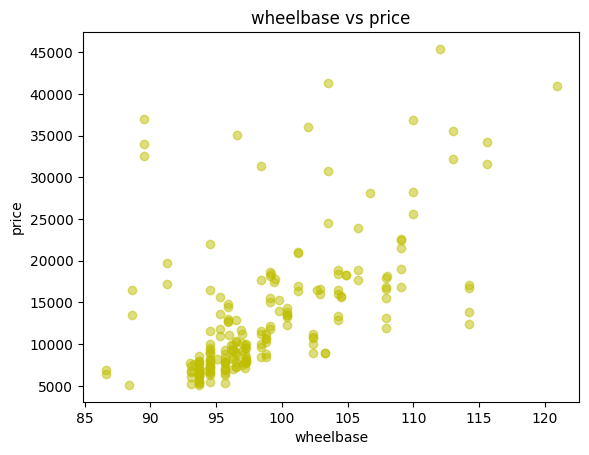

In [138]:
plt.scatter(dataset['wheelbase'],dataset['price'],color='y',alpha=0.5)
plt.title('wheelbase vs price')
plt.xlabel('wheelbase')
plt.ylabel('price')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


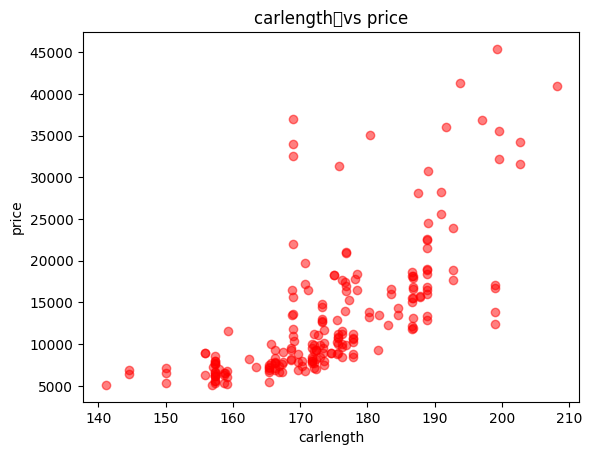

In [139]:
plt.scatter(dataset['carlength'],dataset['price'],color='r',alpha=0.5)
plt.title('carlength	vs price')
plt.xlabel('carlength')
plt.ylabel('price')
plt.show()


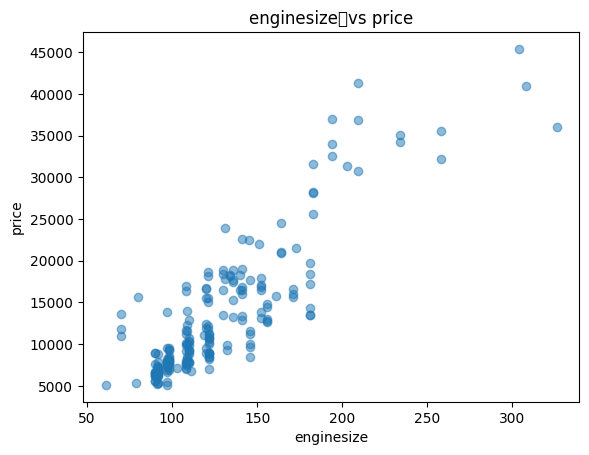

In [140]:
plt.scatter(dataset['enginesize'],dataset['price'],alpha=0.5)
plt.title('enginesize	vs price')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

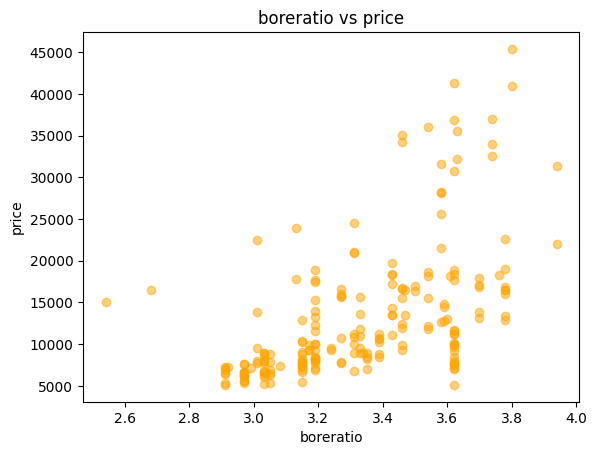

In [141]:
plt.scatter(dataset['boreratio'],dataset['price'],color='orange',alpha=0.5)
plt.title('boreratio vs price')
plt.xlabel('boreratio')
plt.ylabel('price')
plt.show()

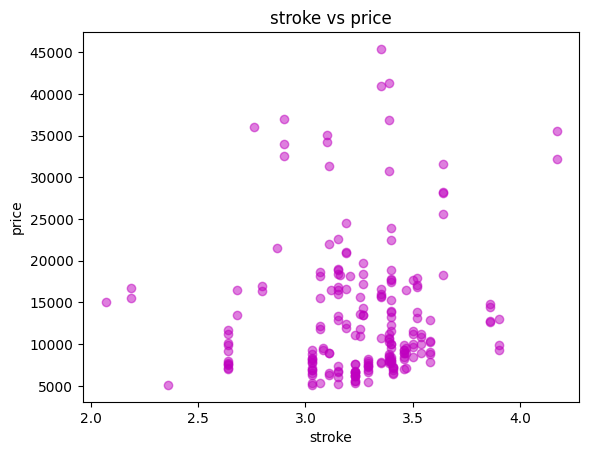

In [142]:
plt.scatter(dataset['stroke'],dataset['price'],color='m',alpha=0.5)
plt.title('stroke vs price')
plt.xlabel('stroke')
plt.ylabel('price')
plt.show()

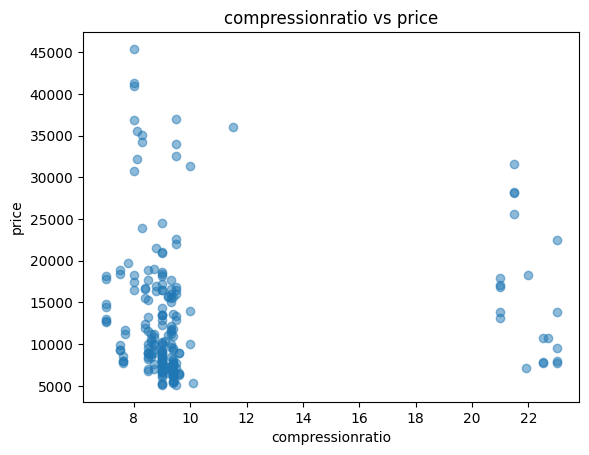

In [143]:
plt.scatter(dataset['compressionratio'],dataset['price'],alpha=0.5)
plt.title('compressionratio vs price')
plt.xlabel('compressionratio')
plt.ylabel('price')
plt.show()

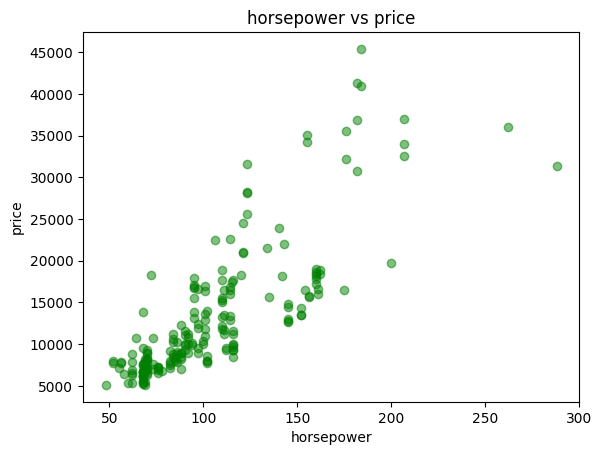

In [144]:
plt.scatter(dataset['horsepower'],dataset['price'],color='g',alpha=0.5)
plt.title('horsepower vs price')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

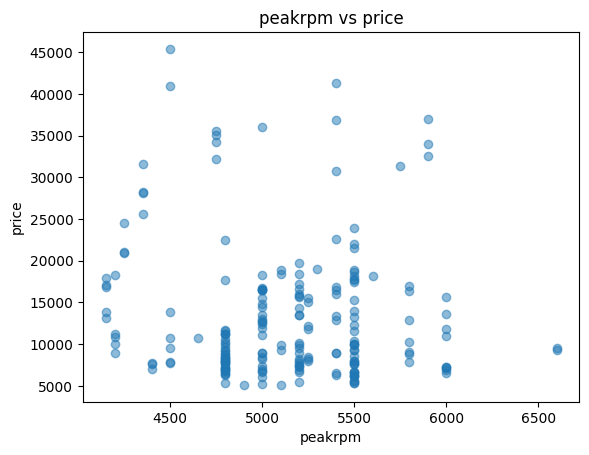

In [145]:
plt.scatter(dataset['peakrpm'],dataset['price'],alpha=0.5)
plt.title('peakrpm vs price')
plt.xlabel('peakrpm')
plt.ylabel('price')
plt.show()

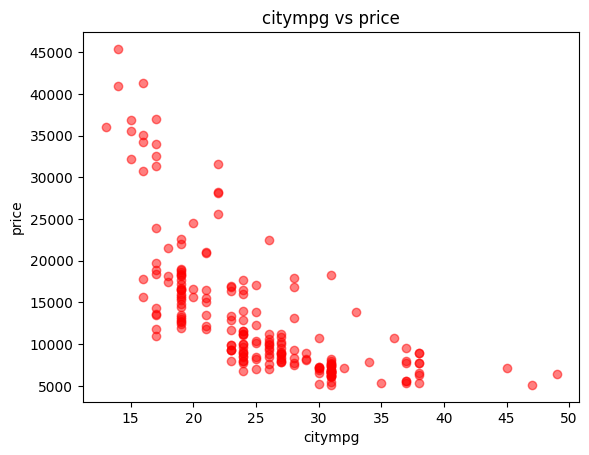

In [146]:
plt.scatter(dataset['citympg'],dataset['price'],color='r',alpha=0.5)
plt.title('citympg vs price')
plt.xlabel('citympg')
plt.ylabel('price')
plt.show()

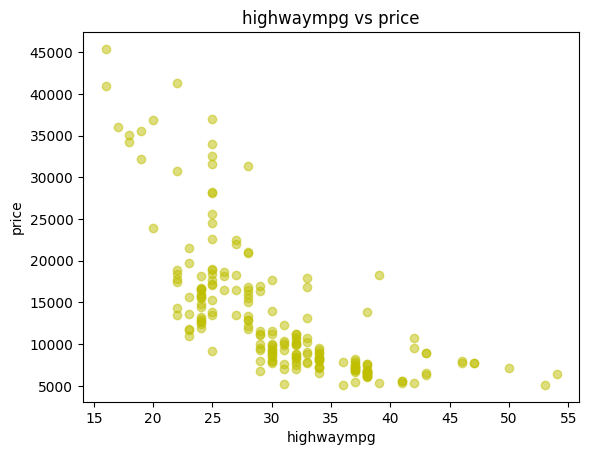

In [147]:
plt.scatter(dataset['highwaympg'],dataset['price'],color='y',alpha=0.5)
plt.title('highwaympg vs price')
plt.xlabel('highwaympg')
plt.ylabel('price')
plt.show()

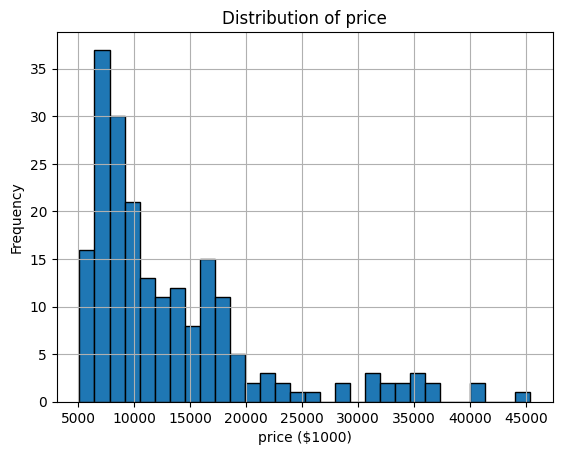

In [148]:
dataset['price'].hist(bins=30, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('price ($1000)')
plt.ylabel('Frequency')
plt.show()


In [149]:
X=dataset.drop(['price'],axis=1)
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [150]:
Y=dataset['price']
Y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [152]:
X_train[0:10]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,four,134,idi,3.43,3.64,22.0,72,4200,31,39
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,...,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,...,four,92,2bbl,3.05,3.03,9.0,62,4800,31,37
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
24,25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,...,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,four,152,idi,3.70,3.52,21.0,95,4150,28,33
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,four,156,mfi,3.60,3.90,7.0,145,5000,19,24
19,20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,...,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43


In [153]:
numerical_features = X.select_dtypes(include=np.number).columns

X_train, X_test, y_train, y_test = train_test_split(
    X[numerical_features], Y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
X_train[0:10]

array([[0.32352941, 0.4       , 0.63103448, 0.52413793, 0.40952381,
        0.55      , 0.39207833, 0.25      , 0.63571429, 0.74761905,
        0.9375    , 0.08474576, 0.02040816, 0.5625    , 0.67647059],
       [0.54411765, 0.4       , 0.73448276, 0.72586207, 0.62857143,
        0.74166667, 0.55896751, 0.1953125 , 0.65714286, 0.05714286,
        0.0875    , 0.18220339, 0.34693878, 0.1875    , 0.23529412],
       [0.75      , 0.4       , 0.3137931 , 0.43275862, 0.17142857,
        0.94166667, 0.20516244, 0.0859375 , 0.36428571, 0.45714286,
        0.125     , 0.04237288, 0.26530612, 0.5625    , 0.61764706],
       [0.47058824, 0.6       , 0.27241379, 0.35689655, 0.19047619,
        0.55833333, 0.06764575, 0.10546875, 0.43571429, 0.58095238,
        0.15      , 0.0720339 , 0.42857143, 0.5625    , 0.61764706],
       [0.18627451, 0.4       , 0.34137931, 0.39482759, 0.32380952,
        0.45833333, 0.20916778, 0.15625   , 0.43571429, 0.71904762,
        0.125     , 0.1440678 , 0.67346939, 

In [155]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [156]:
regressor.intercept_

3899.818725401372

In [157]:
regressor.coef_

array([ -2595.64230896,   1139.26505328,   3378.92004781,  -3133.53392485,
         5019.27201536,   3037.69182072,   1506.48942266,  28909.07179109,
          715.16072987,  -6861.9850832 ,   5754.2213498 ,   6818.36740147,
         5644.71370407, -12492.99543164,   7131.25542817])

In [158]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 11710105.078807378
R-squared: 0.8516657126363215


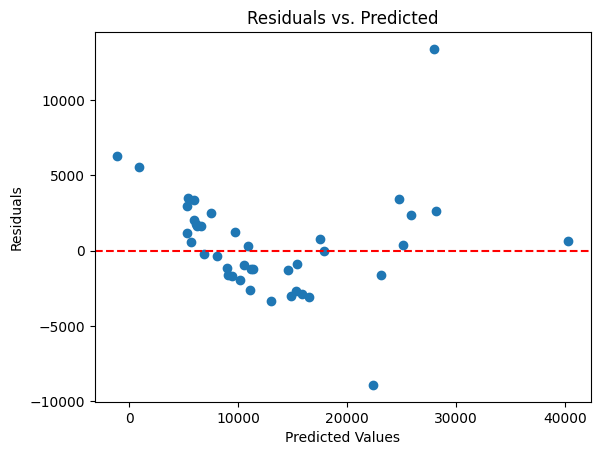

In [159]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [160]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)


Ridge()

In [161]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [162]:
y_pred_lin = regressor.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_lin, y_pred_ridge, y_pred_lasso


(array([28136.61662501, 17897.05420754, 10501.64869541, 14894.10445051,
        25867.1892059 ,  6173.84364331,  8980.28750149,  5919.21217674,
        11392.64574211,  9460.45070261, 14560.47727625,  5262.80065897,
        17528.77959034,  7491.46641038, 40299.85379014,  5336.56626822,
        -1096.23360087, 15347.30470178, 10145.97735703, 11163.54831384,
        11083.28073461, 22416.79275323,  6592.9098689 ,   938.10218382,
         6895.75103695, 27936.87659594, 12978.79601747, 16477.60756576,
         5956.53671362, 15851.60074806, 25165.44825207,  5672.24625495,
         6140.96330188, 23125.61626048,  8083.42458411, 24748.61143859,
        10938.04831201,  9709.93935657,  5425.3770443 , 15389.31688372,
         9064.98801667]),
 array([25927.80133305, 19503.31562143, 10297.50416771, 15068.26617235,
        25232.08978457,  6322.35833311,  7620.45019414,  6182.72622369,
        11577.81438159,  7856.56592495, 13828.61273993,  6260.53401415,
        16267.18446962,  8705.17420521

In [163]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lin, mse_ridge, mse_lasso

(11710105.078807378, 13232905.393376904, 11705902.116753336)

In [164]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_lin, r2_ridge, r2_lasso

(0.8516657126363215, 0.8323760907295417, 0.8517189524131559)

In [165]:
print(f"Linear Regression - MSE: {mse_lin}, R²: {r2_lin}")
print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}")
print(f"Lasso Regression - MSE: {mse_lasso}, R²: {r2_lasso}")


Linear Regression - MSE: 11710105.078807378, R²: 0.8516657126363215
Ridge Regression - MSE: 13232905.393376904, R²: 0.8323760907295417
Lasso Regression - MSE: 11705902.116753336, R²: 0.8517189524131559


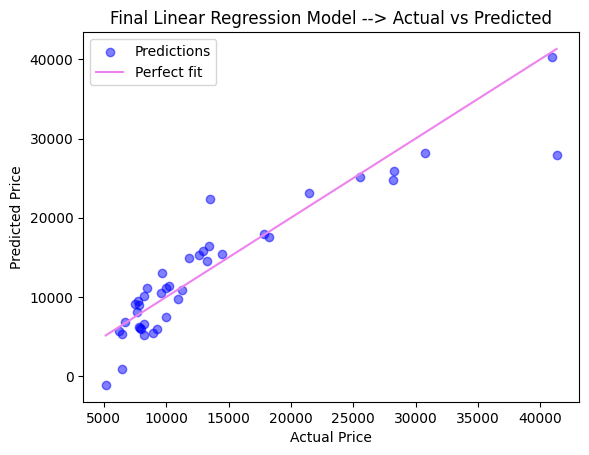

In [166]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='violet', label='Perfect fit')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Final Linear Regression Model --> Actual vs Predicted')

plt.legend()

plt.show()


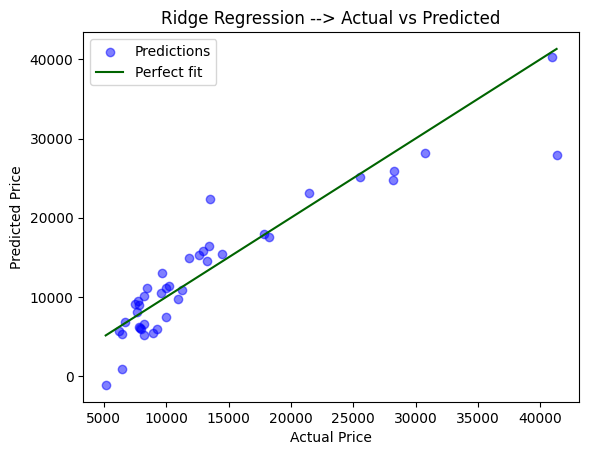

In [167]:
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkgreen', label='Perfect fit')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression --> Actual vs Predicted')

plt.legend()

plt.show()


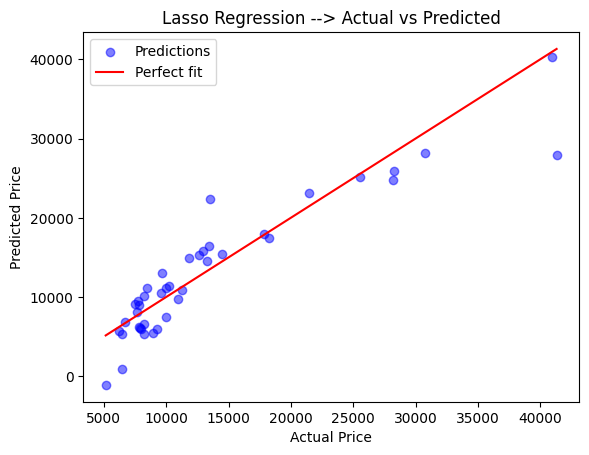

In [168]:
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect fit')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression --> Actual vs Predicted')

plt.legend()

plt.show()
